In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# To Do

- Calculate average home/away points scored and points allowed
- Touchdowns versus team trends
- Position versus team trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset here
file_path = '/path/to/your/Games.csv' # Update this with the correct file path
games_df = pd.read_csv(file_path)

# Ensure the correct season is selected
latest_season = games_df['season'].max()
latest_season_games = games_df[games_df['season'] == latest_season]

# Trend 1: Team Performance Against the Spread
latest_season_games['home_beat_spread'] = (latest_season_games['home_score'] + latest_season_games['home_spread']) > latest_season_games['away_score']
latest_season_games['away_beat_spread'] = (latest_season_games['away_score'] + latest_season_games['away_spread'].astype(float)) > latest_season_games['home_score']
home_spread_performance = latest_season_games.groupby('home_team')['home_beat_spread'].mean()
away_spread_performance = latest_season_games.groupby('away_team')['away_beat_spread'].mean()
combined_spread_performance = home_spread_performance.add(away_spread_performance, fill_value=0) / 2

# Trend 2: Team Scoring Trends
home_avg_points = latest_season_games.groupby('home_team')['home_score'].mean()
away_avg_points = latest_season_games.groupby('away_team')['away_score'].mean()
combined_avg_points = (home_avg_points.add(away_avg_points, fill_value=0) / 2).sort_values(ascending=False)

# Trend 3: Coach Impact on Wins
home_coach_wins = latest_season_games[latest_season_games['home_score'] > latest_season_games['away_score']].groupby('home_coach').size()
away_coach_wins = latest_season_games[latest_season_games['away_score'] > latest_season_games['home_score']].groupby('away_coach').size()
coach_wins = home_coach_wins.add(away_coach_wins, fill_value=0)
home_coach_games = latest_season_games['home_coach'].value_counts()
away_coach_games = latest_season_games['away_coach'].value_counts()
coach_games = home_coach_games.add(away_coach_games, fill_value=0)
coach_win_rate = coach_wins / coach_games

# Trend 4: Defensive Strength - Points Allowed
home_avg_points_allowed = latest_season_games.groupby('home_team')['away_score'].mean()
away_avg_points_allowed = latest_season_games.groupby('away_team')['home_score'].mean()
combined_avg_points_allowed = (home_avg_points_allowed.add(away_avg_points_allowed, fill_value=0) / 2).sort_values()

# Trend 5: Stadium Advantage
home_wins_by_stadium = latest_season_games[latest_season_games['home_score'] > latest_season_games['away_score']].groupby('stadium').size()
total_games_by_stadium = latest_season_games['stadium'].value_counts()
stadium_advantage = home_wins_by_stadium / total_games_by_stadium

# Visualization
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
combined_spread_performance.sort_values().plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Team Performance Against the Spread')
combined_avg_points.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Average Points Scored by Teams')
coach_win_rate.sort_values().plot(kind='barh', ax=axes[1, 0])
axes[1, 0].set_title('Coach Win Rate')
combined_avg_points_allowed.plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('Average Points Allowed by Teams')
stadium_advantage.sort_values().plot(kind='barh', ax=axes[2, 0])
axes[2, 0].set_title('Home Team Win Rate by Stadium')
plt.tight_layout()
plt.show()


In [3]:
# ATS record after coming off a loss

import pandas as pd

# Load the data
file_path = './data/Games.csv'
games_df = pd.read_csv(file_path)

# Convert 'away_spread' to numeric, setting errors='coerce' to turn non-numeric values into NaNs
games_df['away_spread'] = pd.to_numeric(games_df['away_spread'], errors='coerce')

# Fill any NaN values that may have been introduced in 'away_spread'
games_df['away_spread'] = games_df['away_spread'].fillna(method='ffill')

# Adding columns for spread cover
games_df['home_cover'] = (games_df['home_score'] + games_df['home_spread']) > games_df['away_score']
games_df['away_cover'] = (games_df['away_score'] - games_df['away_spread']) > games_df['home_score']

# Filter for the last two seasons
last_two_seasons = games_df['season'].nlargest(2).unique()
games_last_two_seasons = games_df[games_df['season'].isin(last_two_seasons)]

# Initialize dictionary to hold ATS records
ats_records_last_two_seasons = {}

# Loop through each team
for team in games_df['home_team'].unique():
    # Filter games for the team
    team_games = games_last_two_seasons[(games_last_two_seasons['home_team'] == team) | (games_last_two_seasons['away_team'] == team)]

    # Variables to track wins, losses, and last game result
    ats_wins = 0
    ats_losses = 0
    lost_last_game = False

    # Iterate through team games
    for index, row in team_games.iterrows():
        home_team = row['home_team'] == team
        away_team = row['away_team'] == team
        team_cover = (home_team and row['home_cover']) or (away_team and row['away_cover'])
        team_lost = (home_team and row['home_score'] < row['away_score']) or (away_team and row['away_score'] < row['home_score'])

        # Update ATS record if the team lost the previous game
        if lost_last_game:
            if team_cover:
                ats_wins += 1
            else:
                ats_losses += 1
            lost_last_game = False

        # Check if the team lost this game
        if team_lost:
            lost_last_game = True

    # Update the record for the team
    ats_records_last_two_seasons[team] = (ats_wins, ats_losses)

# ats_records_last_two_seasons
# Sort the teams based on win percentage (wins / (wins + losses))
sorted_ats_records = sorted(ats_records_last_two_seasons.items(), 
                            key=lambda x: x[1][0] / (x[1][0] + x[1][1]) if (x[1][0] + x[1][1]) > 0 else 0, 
                            reverse=True)

# Print the sorted records
for team, record in sorted_ats_records:
    wins, losses = record
    print(f"{team}: {wins} Wins, {losses} Losses")


MIA: 4 Wins, 0 Losses
BUF: 6 Wins, 0 Losses
BAL: 3 Wins, 0 Losses
DET: 4 Wins, 0 Losses
PIT: 6 Wins, 1 Losses
HOU: 6 Wins, 1 Losses
DAL: 4 Wins, 1 Losses
IND: 5 Wins, 2 Losses
TB: 5 Wins, 2 Losses
SEA: 5 Wins, 2 Losses
KC: 4 Wins, 2 Losses
CHI: 6 Wins, 3 Losses
ATL: 5 Wins, 3 Losses
DEN: 5 Wins, 3 Losses
CLE: 3 Wins, 2 Losses
LAR: 4 Wins, 3 Losses
CIN: 4 Wins, 3 Losses
NO: 4 Wins, 4 Losses
PHI: 2 Wins, 2 Losses
TEN: 5 Wins, 5 Losses
SF: 2 Wins, 2 Losses
JAX: 3 Wins, 4 Losses
NYG: 4 Wins, 6 Losses
MIN: 3 Wins, 5 Losses
LVR: 3 Wins, 5 Losses
WAS: 4 Wins, 7 Losses
NYJ: 3 Wins, 6 Losses
LAC: 3 Wins, 7 Losses
NE: 3 Wins, 8 Losses
ARI: 3 Wins, 9 Losses
GB: 1 Wins, 7 Losses
CAR: 1 Wins, 12 Losses


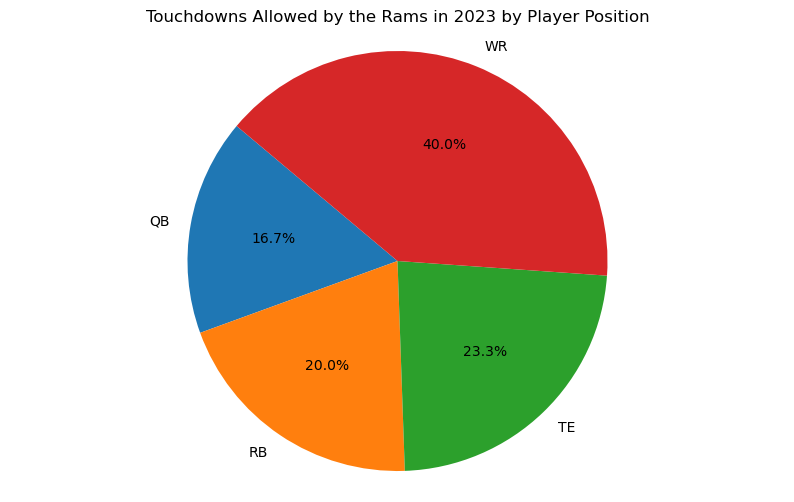

In [4]:
import pandas as pd

# Load the CSV files into Pandas dataframes
games_df = pd.read_csv('./data/Games.csv')
playerstats_df = pd.read_csv('./data/PlayerStats.csv')

# Filter the Games dataframe for the 2023 season where the Rams were the opposing team
rams_games_2023 = games_df[(games_df['season'] == 2023) & 
                          ((games_df['home_team'] == 'LAR') | (games_df['away_team'] == 'LAR'))]

# Merge this filtered dataframe with the PlayerStats dataframe
rams_opponents_stats = pd.merge(rams_games_2023, playerstats_df, on='game_id')

# Filter out players from the Rams team
rams_opponents_stats = rams_opponents_stats[rams_opponents_stats['recent_team'] != 'LAR']

# Group by player position and sum up rushing and receiving touchdowns
tds_against_rams = rams_opponents_stats.groupby('position').agg(
    total_rushing_tds=pd.NamedAgg(column='rushing_tds', aggfunc='sum'),
    total_receiving_tds=pd.NamedAgg(column='receiving_tds', aggfunc='sum')
).reset_index()

# Calculate total touchdowns by each position
tds_against_rams['total_tds'] = tds_against_rams['total_rushing_tds'] + tds_against_rams['total_receiving_tds']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(tds_against_rams['total_tds'], labels=tds_against_rams['position'], autopct='%1.1f%%', startangle=140)
plt.title('Touchdowns Allowed by the Rams in 2023 by Player Position')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()



In [ ]:
# ### Calculate average home/away points scored and points allowed

# # Connect to the SQLite database
# db_path = '../Database/nfl.db'  # Replace with your database path
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Define the team abbreviation
# team = 'MIA'  # Replace with your team's abbreviation

# # Query to get games for the specified team in the 2023 season
# query = f"""
# SELECT away_team, away_score, home_team, home_score FROM Games 
# WHERE season = 2023 AND (away_team = '{team}' OR home_team = '{team}');
# """
# cursor.execute(query)
# games = cursor.fetchall()

# home_scores, away_scores = [], []
# home_points_allowed, away_points_allowed = [], []

# for game in games:
#     if game[0] == team:  # team is away
#         away_scores.append(game[1])
#         away_points_allowed.append(game[3])
#     else:  # team is home
#         home_scores.append(game[3])
#         home_points_allowed.append(game[1])

# avg_home_score = sum(home_scores) / len(home_scores) if home_scores else 0
# avg_away_score = sum(away_scores) / len(away_scores) if away_scores else 0
# avg_home_allowed = sum(home_points_allowed) / len(home_points_allowed) if home_points_allowed else 0
# avg_away_allowed = sum(away_points_allowed) / len(away_points_allowed) if away_points_allowed else 0

# # Close the database connection
# conn.close()

# # Output results
# print(f"Average Home Score: {avg_home_score}")
# print(f"Average Away Score: {avg_away_score}")
# print(f"Average Home Points Allowed: {avg_home_allowed}")
# print(f"Average Away Points Allowed: {avg_away_allowed}")


In [ ]:
# ### Touchdown analysis final
# ### Dynamically fetch players from a team

# def find_players_and_touchdowns(team_name, db_path):
#     # Connect to the SQLite database
#     conn = sqlite3.connect(db_path)

#     # Initialize the result DataFrame
#     result_df = pd.DataFrame()

#     # Define queries for WR, RB, and TE
#     queries = {
#         'QB': f"""
#             SELECT 'QB' as Position, qb_name as Player_Name, SUM(rush_td) as Total_Touchdowns, SUM(rush_td) as Rushing_TD, 0 as Receiving_TD
#             FROM QBGameStats
#             WHERE player_team = '{team_name}' AND season = 2023
#             GROUP BY qb_name
#         """,
#         'WR': f"""
#             SELECT 'WR' as Position, wr_name as Player_Name, SUM(rec_td) as Total_Touchdowns, 0 as Rushing_TD, SUM(rec_td) as Receiving_TD
#             FROM WRGameStats
#             WHERE player_team = '{team_name}' AND season = 2023
#             GROUP BY wr_name
#         """,
#         'RB': f"""
#             SELECT 'RB' as Position, rb_name as Player_Name, SUM(rush_td + rec_td) as Total_Touchdowns, SUM(rush_td) as Rushing_TD, SUM(rec_td) as Receiving_TD
#             FROM RBGameStats
#             WHERE player_team = '{team_name}' AND season = 2023
#             GROUP BY rb_name
#         """,
#         'TE': f"""
#             SELECT 'TE' as Position, te_name as Player_Name, SUM(rec_td) as Total_Touchdowns, 0 as Rushing_TD, SUM(rec_td) as Receiving_TD
#             FROM TEGameStats
#             WHERE player_team = '{team_name}' AND season = 2023
#             GROUP BY te_name
#         """
#     }

#     # Execute the queries and concatenate the results to the result DataFrame
#     for pos, query in queries.items():
#         temp_df = pd.read_sql_query(query, conn)
#         result_df = pd.concat([result_df, temp_df], ignore_index=True)

#     # Close the connection
#     conn.close()

#     # Sort the result DataFrame by Total_Touchdowns in descending order
#     result_df.sort_values(by=['Position', 'Total_Touchdowns'], ascending=[True, False], inplace=True)

#     return result_df

# # Example usage
# team_name = "PHI"  # Replace with the team name you're interested in
# db_path = 'nfl.db'  # Replace with the path to your SQLite database

# # Call the function and print the result
# result = find_players_and_touchdowns(team_name, db_path)
# print(result)



### EXAMPLE OUTPUT ###

#   Position       Player_Name Total_Touchdowns Rushing_TD Receiving_TD
# 0       QB       JALEN HURTS                6          6            0
# 4       RB     D'ANDRE SWIFT                3          2            1
# 5       RB  KENNETH GAINWELL                1          1            0
# 6       RB     RASHAAD PENNY                0          0            0
# 1       WR        A.J. BROWN                3          0            3
# 2       WR     DEVONTA SMITH                2          0            2
# 3       WR       JULIO JONES                0          0            0


# ATS Records

In [7]:
# Replace these paths with the actual paths to your files
games_path = './data/Games.csv'
teams_path = './data/Teams.csv'

# Load the datasets
games_df = pd.read_csv(games_path)
teams_df = pd.read_csv(teams_path)

# Filter for the 2023 season
games_2023_df = games_df[games_df['season'] == 2023]

# Calculate ATS results
games_2023_df['home_ats_result'] = games_2023_df.apply(
    lambda row: 'Win' if row['home_score'] - row['away_score'] > row['spread_line'] else
                'Loss' if row['home_score'] - row['away_score'] < row['spread_line'] else 'Tie', axis=1)
games_2023_df['away_ats_result'] = games_2023_df.apply(
    lambda row: 'Win' if row['away_score'] - row['home_score'] > -row['spread_line'] else
                'Loss' if row['away_score'] - row['home_score'] < -row['spread_line'] else 'Tie', axis=1)

# Count ATS results for each team
ats_results = {}
for index, row in games_2023_df.iterrows():
    for team_type in ['home', 'away']:
        team = row[f'{team_type}_team']
        result = row[f'{team_type}_ats_result']

        if team not in ats_results:
            ats_results[team] = {'Win': 0, 'Loss': 0, 'Tie': 0}
        ats_results[team][result] += 1

# Convert to DataFrame and sort
ats_results_df = pd.DataFrame.from_dict(ats_results, orient='index')
ats_results_df['Total Games'] = ats_results_df.sum(axis=1)
ats_results_df.sort_values(by=['Win', 'Tie', 'Loss'], ascending=[False, False, True], inplace=True)

# Display the first 32 teams (all teams)
print(ats_results_df.head(32))


     Win  Loss  Tie  Total Games
DET    9     5    0           14
BAL    9     5    0           14
IND    9     5    0           14
TB     9     5    0           14
MIA    9     5    0           14
DAL    9     5    0           14
SEA    8     5    1           14
LAR    8     5    1           14
JAX    8     6    0           14
SF     8     6    0           14
MIN    7     4    3           14
CLE    7     5    2           14
LVR    7     5    2           14
PHI    7     5    2           14
KC     7     6    1           14
HOU    7     7    0           14
PIT    7     7    0           14
ARI    7     7    0           14
GB     7     7    0           14
CHI    6     5    3           14
CIN    6     6    2           14
TEN    6     8    0           14
BUF    6     8    0           14
WAS    5     8    1           14
DEN    5     8    1           14
NYG    5     8    1           14
NYJ    5     8    1           14
NO     4     9    1           14
LAC    4     9    1           14
ATL    4  

/var/folders/z3/6n8jt4ms48xbjzlvjdphpzqh0000gn/T/ipykernel_1828/1507985781.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_2023_df['home_ats_result'] = games_2023_df.apply(
/var/folders/z3/6n8jt4ms48xbjzlvjdphpzqh0000gn/T/ipykernel_1828/1507985781.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_2023_df['away_ats_result'] = games_2023_df.apply(


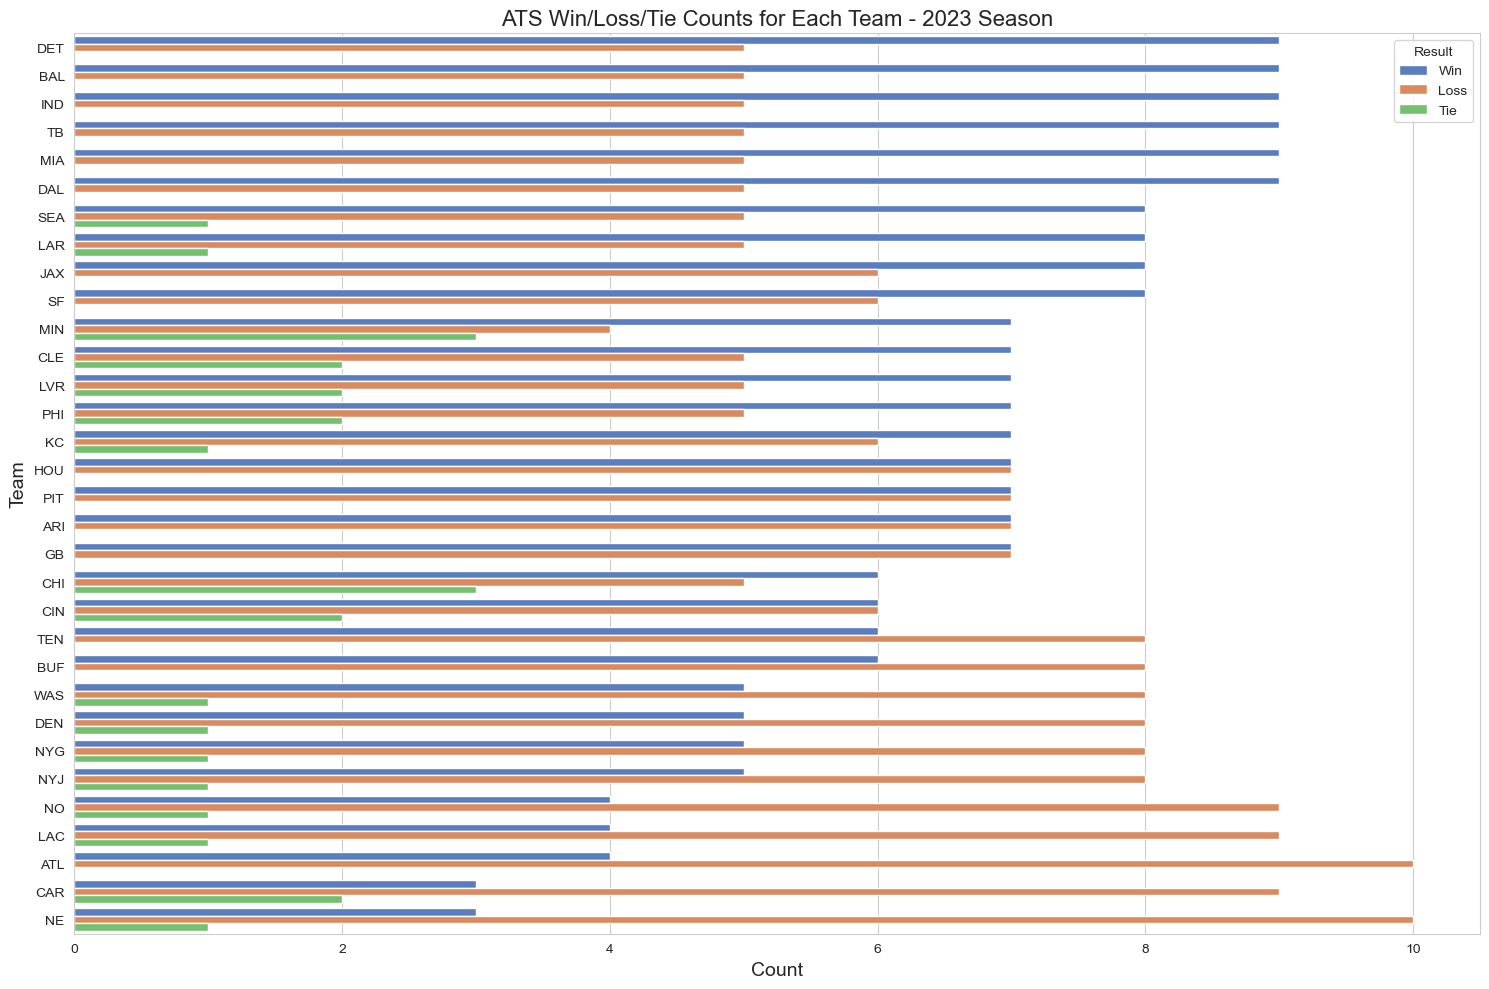

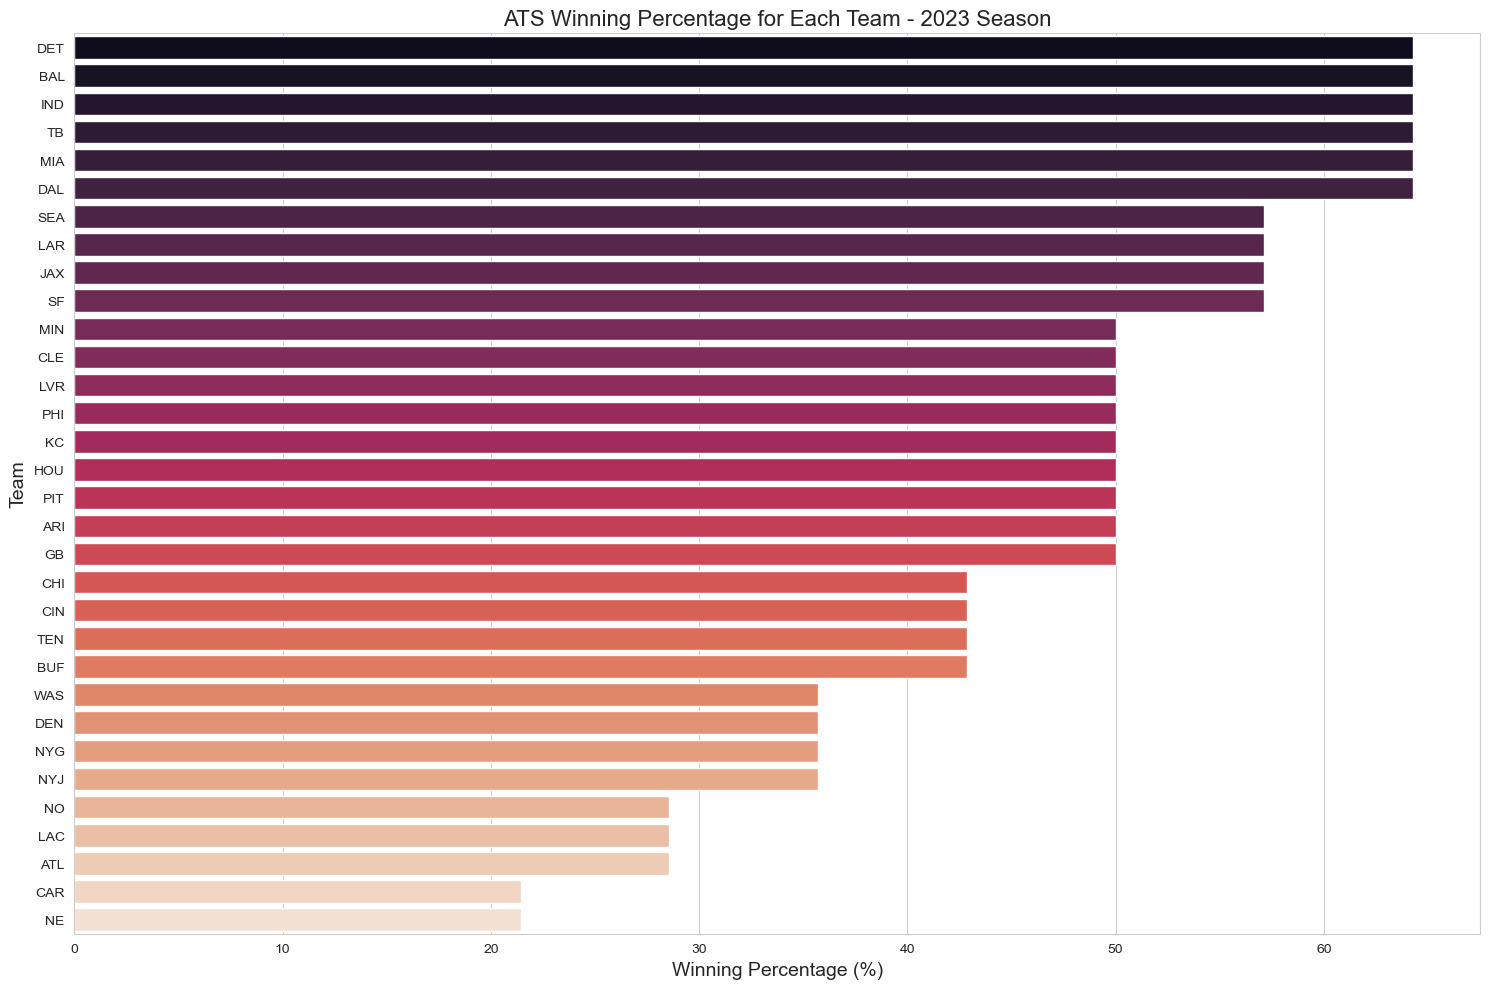

In [13]:
### Graphs^

# Prepare DataFrame for ATS Win/Loss/Tie Count Plot
ats_count_plot_df = ats_results_df.copy()
ats_count_plot_df['Team'] = ats_count_plot_df.index
ats_count_plot_df = ats_count_plot_df.melt(id_vars='Team', value_vars=['Win', 'Loss', 'Tie'], 
                                           var_name='Result', value_name='Count')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# ATS Win/Loss/Tie Count Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Team', hue='Result', data=ats_count_plot_df, palette='muted')
plt.title('ATS Win/Loss/Tie Counts for Each Team - 2023 Season', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

# Prepare DataFrame for ATS Winning Percentage Plot
ats_results_df['Winning Percentage'] = (ats_results_df['Win'] / ats_results_df['Total Games']) * 100

# ATS Winning Percentage Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Winning Percentage', y=ats_results_df.index, data=ats_results_df, palette='rocket')
plt.title('ATS Winning Percentage for Each Team - 2023 Season', fontsize=16)
plt.xlabel('Winning Percentage (%)', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

# Over/Under Records

In [11]:
# Replace these paths with the actual paths to your files
games_path = './data/Games.csv'
teams_path = './data/Teams.csv'

# Load the datasets
games_df = pd.read_csv(games_path)
teams_df = pd.read_csv(teams_path)

# Filter for the 2023 season
games_2023_df = games_df[games_df['season'] == 2023]

# Calculate over/under result for each game
games_2023_df['over_under_result'] = games_2023_df.apply(
    lambda row: 'Over' if row['home_score'] + row['away_score'] > row['total_line'] else
                'Under' if row['home_score'] + row['away_score'] < row['total_line'] else 'Push', axis=1)

# Initialize a dictionary to hold the Over/Under records
over_under_records = {team: {'Over': 0, 'Under': 0, 'Push': 0} for team in teams_df['TeamID']}

# Calculate the Over/Under records for each team
for _, game in games_2023_df.iterrows():
    over_under_records[game['home_team']][game['over_under_result']] += 1
    over_under_records[game['away_team']][game['over_under_result']] += 1

# Convert to DataFrame and sort by Over percentage
over_under_results_df = pd.DataFrame.from_dict(over_under_records, orient='index')
over_under_results_df['Total Games'] = over_under_results_df.sum(axis=1)
over_under_results_df['Over Percentage'] = (over_under_results_df['Over'] / over_under_results_df['Total Games']) * 100
over_under_results_df.sort_values(by='Over Percentage', ascending=False, inplace=True)

# Display the first 32 teams (all teams)
print(over_under_results_df.head(32))


     Over  Under  Push  Total Games  Over Percentage
IND    10      4     0           14        71.428571
DET     9      5     0           14        64.285714
ARI     8      6     0           14        57.142857
DAL     8      5     1           14        57.142857
MIA     8      6     0           14        57.142857
GB      8      6     0           14        57.142857
WAS     8      6     0           14        57.142857
CIN     8      6     0           14        57.142857
CLE     7      6     1           14        50.000000
CHI     7      7     0           14        50.000000
SF      7      6     1           14        50.000000
PHI     7      7     0           14        50.000000
JAX     7      7     0           14        50.000000
LAR     6      8     0           14        42.857143
TB      6      8     0           14        42.857143
SEA     6      8     0           14        42.857143
BAL     6      8     0           14        42.857143
DEN     6      8     0           14        42.

/var/folders/z3/6n8jt4ms48xbjzlvjdphpzqh0000gn/T/ipykernel_1828/2725150551.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_2023_df['over_under_result'] = games_2023_df.apply(


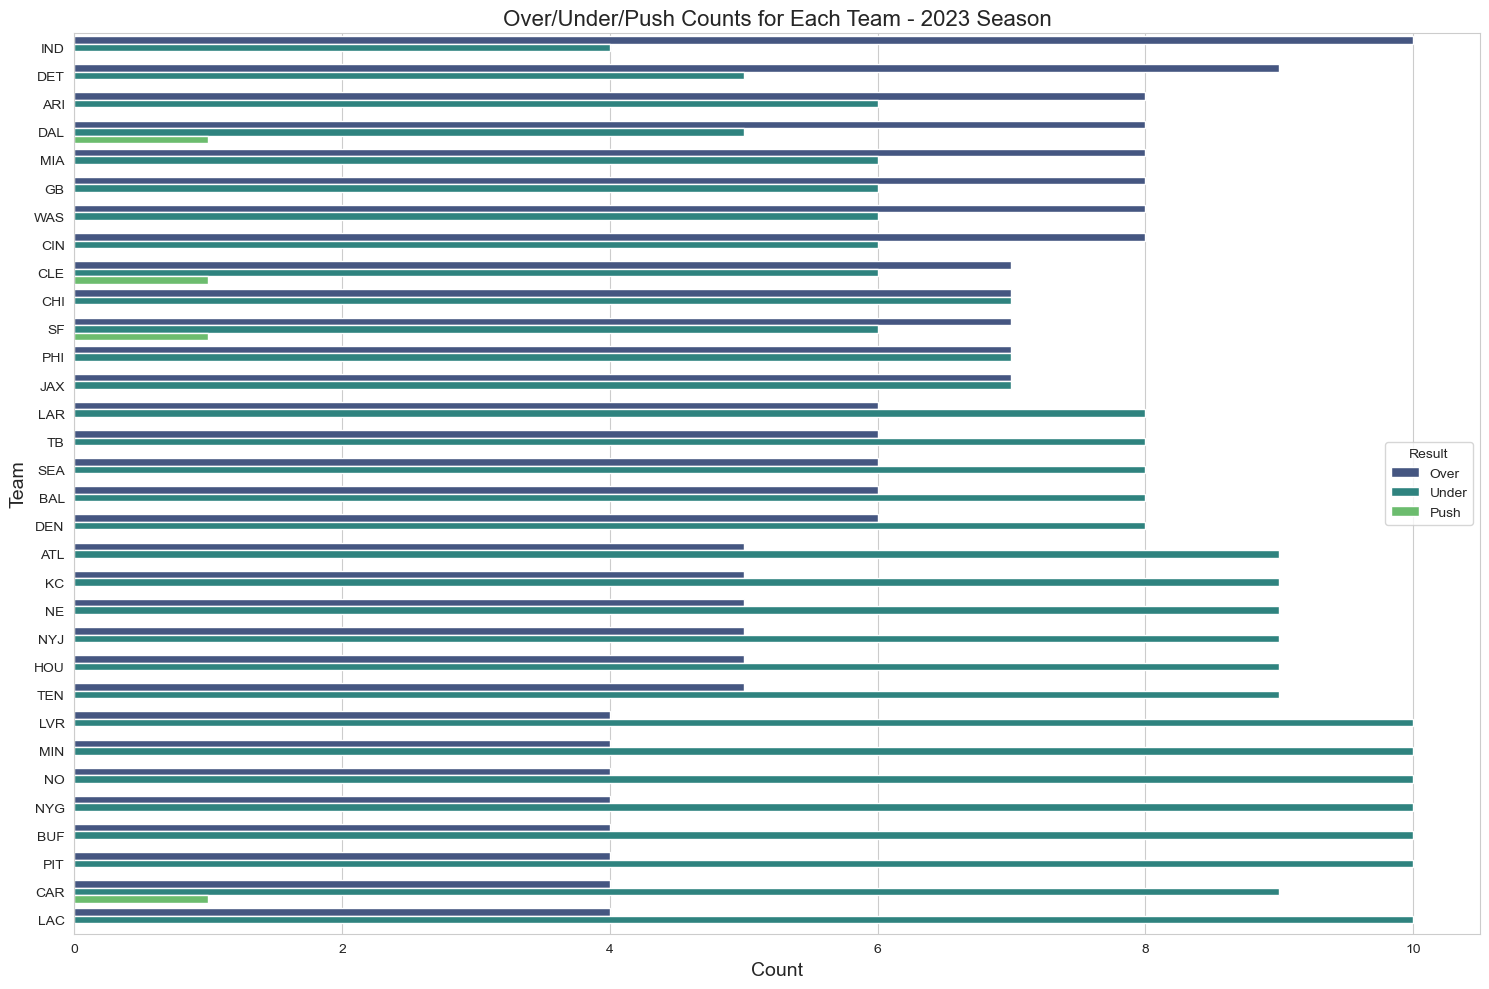

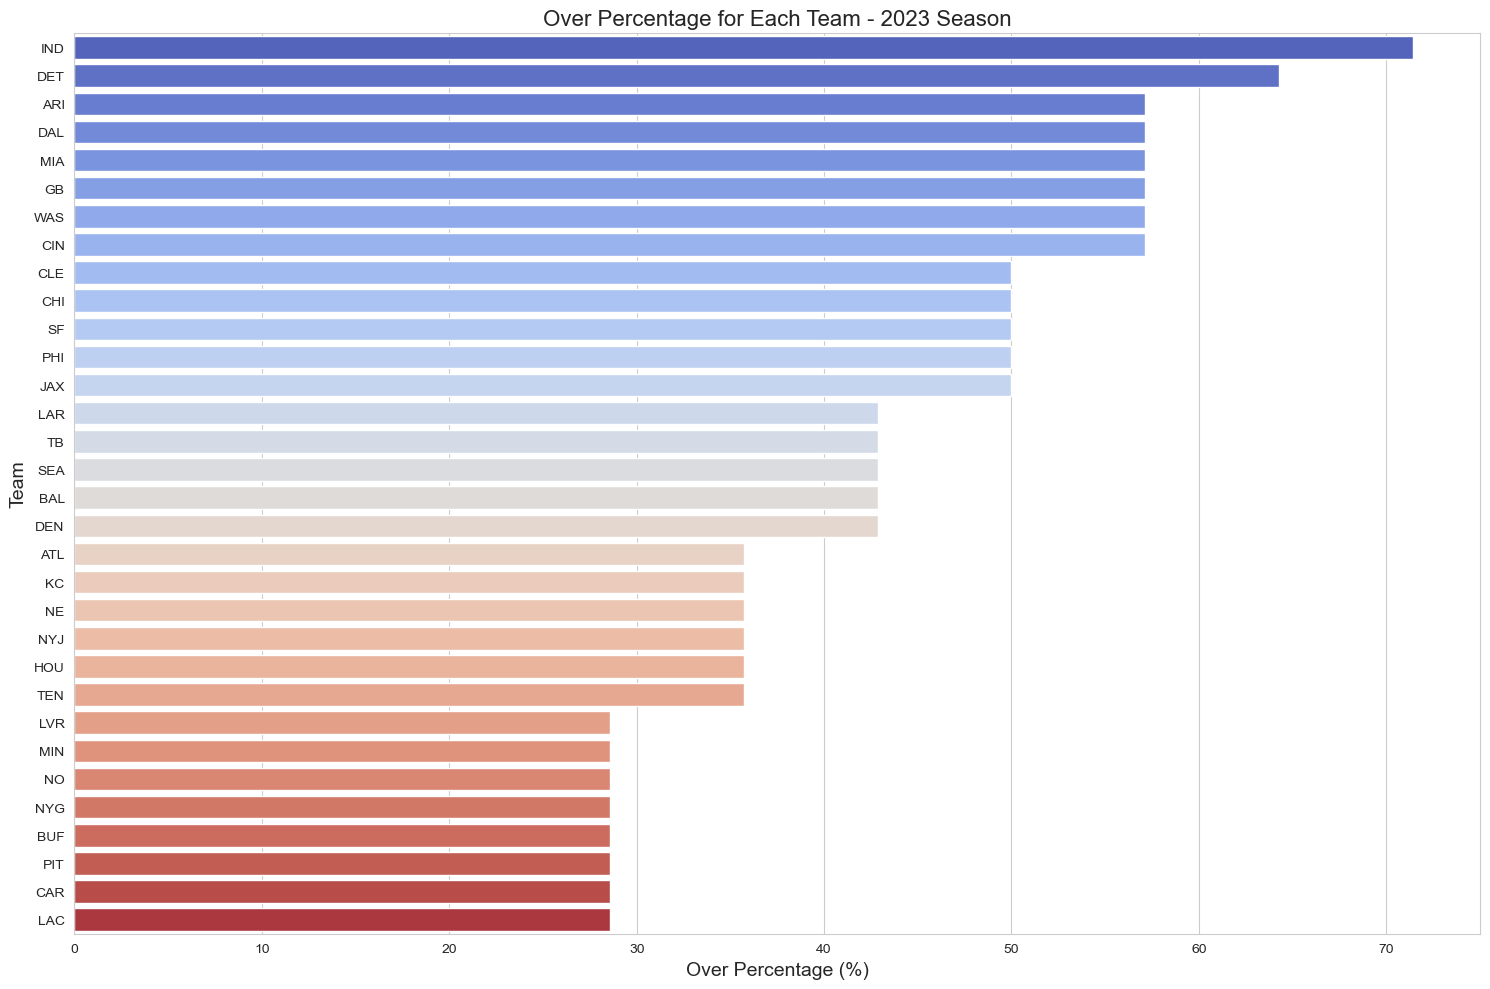

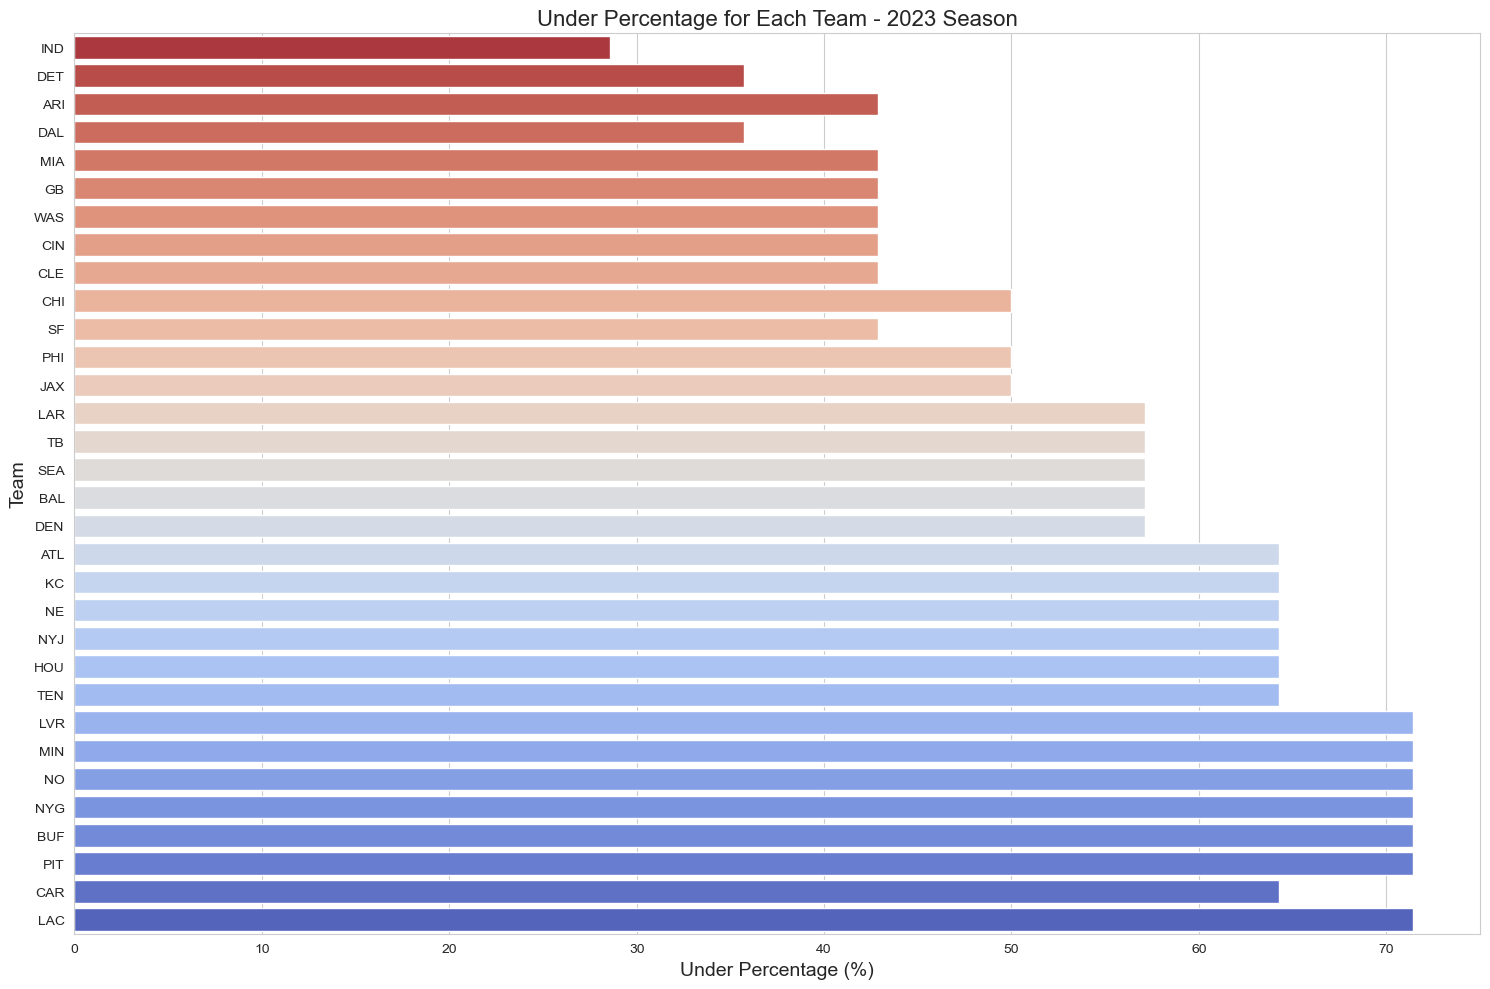

In [12]:
### Graphs^

# Convert to DataFrame for plotting
over_under_results_df = pd.DataFrame.from_dict(over_under_records, orient='index')
over_under_results_df['Total Games'] = over_under_results_df.sum(axis=1)
over_under_results_df['Over Percentage'] = (over_under_results_df['Over'] / over_under_results_df['Total Games']) * 100
over_under_results_df['Under Percentage'] = (over_under_results_df['Under'] / over_under_results_df['Total Games']) * 100
over_under_results_df.sort_values(by='Over Percentage', ascending=False, inplace=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for Over/Under Count
plt.figure(figsize=(15, 10))
over_under_plot_df = over_under_results_df.copy()
over_under_plot_df['Team'] = over_under_plot_df.index
over_under_plot_df = over_under_plot_df.melt(id_vars='Team', value_vars=['Over', 'Under', 'Push'], 
                                             var_name='Result', value_name='Count')
sns.barplot(x='Count', y='Team', hue='Result', data=over_under_plot_df, palette='viridis')
plt.title('Over/Under/Push Counts for Each Team - 2023 Season', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

# Plot for Over Percentage
plt.figure(figsize=(15, 10))
sns.barplot(x='Over Percentage', y=over_under_results_df.index, data=over_under_results_df, palette='coolwarm')
plt.title('Over Percentage for Each Team - 2023 Season', fontsize=16)
plt.xlabel('Over Percentage (%)', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

# Plot for Under Percentage
plt.figure(figsize=(15, 10))
sns.barplot(x='Under Percentage', y=over_under_results_df.index, data=over_under_results_df, palette='coolwarm_r')
plt.title('Under Percentage for Each Team - 2023 Season', fontsize=16)
plt.xlabel('Under Percentage (%)', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

# Divisions/Standings

In [1]:
import pandas as pd

# Load the Teams CSV file (replace 'path_to_file' with the actual path of your Teams.csv file)
teams_df = pd.read_csv('./data/Teams.csv')

# Group teams by their divisions
divisions_teams = teams_df.groupby('Division')['Team'].apply(list).to_dict()

# Print the divisions and their respective teams
for division, teams in divisions_teams.items():
    print(f"{division}:")
    for team in teams:
        print(f"  - {team}")
    print()  # Adding a blank line for better readability

AFC East:
  - Buffalo Bills
  - Miami Dolphins
  - New England Patriots
  - New York Jets

AFC North:
  - Baltimore Ravens
  - Cincinnati Bengals
  - Cleveland Browns
  - Pittsburgh Steelers

AFC South:
  - Houston Texans
  - Indianapolis Colts
  - Jacksonville Jaguars
  - Tennessee Titans

AFC West:
  - Denver Broncos
  - Kansas City Chiefs
  - Los Angeles Chargers
  - Las Vegas Raiders

NFC East:
  - Dallas Cowboys
  - New York Giants
  - Philadelphia Eagles
  - Washington Commanders

NFC North:
  - Chicago Bears
  - Detroit Lions
  - Green Bay Packers
  - Minnesota Vikings

NFC South:
  - Atlanta Falcons
  - Carolina Panthers
  - New Orleans Saints
  - Tampa Bay Buccaneers

NFC West:
  - Arizona Cardinals
  - Los Angeles Rams
  - Seattle Seahawks
  - San Francisco 49ers



In [7]:
import pandas as pd

# Load the CSV files
games_df = pd.read_csv('./data/Games.csv')  # Replace with your file path
teams_df = pd.read_csv('./data/Teams.csv')  # Replace with your file path

# Function to calculate wins, losses, and ties for each team
def calculate_team_records(games_df):
    records = {}
    for _, row in games_df.iterrows():
        if row['away_team'] not in records:
            records[row['away_team']] = {'wins': 0, 'losses': 0, 'ties': 0}
        if row['home_team'] not in records:
            records[row['home_team']] = {'wins': 0, 'losses': 0, 'ties': 0}

        if row['away_score'] > row['home_score']:
            records[row['away_team']]['wins'] += 1
            records[row['home_team']]['losses'] += 1
        elif row['away_score'] < row['home_score']:
            records[row['away_team']]['losses'] += 1
            records[row['home_team']]['wins'] += 1
        else:
            records[row['away_team']]['ties'] += 1
            records[row['home_team']]['ties'] += 1

    return records

# Filter games for the 2023 season
games_2023_df = games_df[games_df['season'] == 2023]

# Calculate the records for the 2023 season
team_records_2023 = calculate_team_records(games_2023_df)

# Update teams dataframe with 2023 season records
teams_df['Wins_2023'] = teams_df['TeamID'].map(lambda x: team_records_2023.get(x, {}).get('wins', 0))
teams_df['Losses_2023'] = teams_df['TeamID'].map(lambda x: team_records_2023.get(x, {}).get('losses', 0))
teams_df['Ties_2023'] = teams_df['TeamID'].map(lambda x: team_records_2023.get(x, {}).get('ties', 0))

# Group teams by divisions and include their 2023 records
divisions_teams_records_2023 = teams_df.groupby('Division').apply(
    lambda x: x[['Team', 'Wins_2023', 'Losses_2023', 'Ties_2023']].to_dict('records')
).to_dict()

# Print the divisions and their respective teams with 2023 records
for division, teams in divisions_teams_records_2023.items():
    print(f"{division}:")
    for team in teams:
        print(f"  - {team['Team']}: {team['Wins_2023']} Wins, {team['Losses_2023']} Losses, {team['Ties_2023']} Ties")
    print()  # Adding a blank line for better readability


AFC East:
  - Buffalo Bills: 8 Wins, 6 Losses, 0 Ties
  - Miami Dolphins: 10 Wins, 4 Losses, 0 Ties
  - New England Patriots: 3 Wins, 11 Losses, 0 Ties
  - New York Jets: 5 Wins, 9 Losses, 0 Ties

AFC North:
  - Baltimore Ravens: 11 Wins, 3 Losses, 0 Ties
  - Cincinnati Bengals: 8 Wins, 6 Losses, 0 Ties
  - Cleveland Browns: 9 Wins, 5 Losses, 0 Ties
  - Pittsburgh Steelers: 7 Wins, 7 Losses, 0 Ties

AFC South:
  - Houston Texans: 8 Wins, 6 Losses, 0 Ties
  - Indianapolis Colts: 8 Wins, 6 Losses, 0 Ties
  - Jacksonville Jaguars: 8 Wins, 6 Losses, 0 Ties
  - Tennessee Titans: 5 Wins, 9 Losses, 0 Ties

AFC West:
  - Denver Broncos: 7 Wins, 7 Losses, 0 Ties
  - Kansas City Chiefs: 9 Wins, 5 Losses, 0 Ties
  - Los Angeles Chargers: 5 Wins, 9 Losses, 0 Ties
  - Las Vegas Raiders: 6 Wins, 8 Losses, 0 Ties

NFC East:
  - Dallas Cowboys: 10 Wins, 4 Losses, 0 Ties
  - New York Giants: 5 Wins, 9 Losses, 0 Ties
  - Philadelphia Eagles: 10 Wins, 4 Losses, 0 Ties
  - Washington Commanders: 4 Wins, 1

In [11]:
import pandas as pd

# Load your data
games_df = pd.read_csv('./data/Games.csv')  # Replace with your file path
teams_df = pd.read_csv('./data/Teams.csv')  # Replace with your file path

# Filter the games to the 2023 season
games_2023 = games_df[games_df['season'] == 2023]

# Initialize dictionaries to store wins and losses for each team
team_wins = {team: 0 for team in teams_df['TeamID']}
team_losses = {team: 0 for team in teams_df['TeamID']}

# Iterate through each game to determine wins and losses
for _, game in games_2023.iterrows():
    away_team = game['away_team']
    home_team = game['home_team']
    away_score = game['away_score']
    home_score = game['home_score']

    # Determine the winner and loser of the game
    if away_score > home_score:
        team_wins[away_team] += 1
        team_losses[home_team] += 1
    elif home_score > away_score:
        team_wins[home_team] += 1
        team_losses[away_team] += 1
    # Ties are not accounted for in this analysis

# Combine wins and losses into a single DataFrame for better presentation
teams_performance_2023 = pd.DataFrame({
    'TeamID': team_wins.keys(),
    'Wins': team_wins.values(),
    'Losses': team_losses.values()
})

# # Sort the DataFrame by Wins and then Losses
# teams_performance_2023_sorted = teams_performance_2023.sort_values(by=['Wins', 'Losses'], ascending=[False, True])

# # Display the sorted DataFrame
# print(teams_performance_2023_sorted)

# Merge with division information
teams_division = teams_df[['TeamID', 'Division']]
standings = pd.merge(teams_performance_2023, teams_division, on='TeamID')

# Group by division and sort
division_standings = standings.groupby('Division').apply(lambda x: x.sort_values(['Wins', 'Losses'], ascending=[False, True])).reset_index(drop=True)

# Display the division standings
print(division_standings)

   TeamID  Wins  Losses   Division
0     MIA    10       4   AFC East
1     BUF     8       6   AFC East
2     NYJ     5       9   AFC East
3      NE     3      11   AFC East
4     BAL    11       3  AFC North
5     CLE     9       5  AFC North
6     CIN     8       6  AFC North
7     PIT     7       7  AFC North
8     HOU     8       6  AFC South
9     IND     8       6  AFC South
10    JAX     8       6  AFC South
11    TEN     5       9  AFC South
12     KC     9       5   AFC West
13    DEN     7       7   AFC West
14    LVR     6       8   AFC West
15    LAC     5       9   AFC West
16    DAL    10       4   NFC East
17    PHI    10       4   NFC East
18    NYG     5       9   NFC East
19    WAS     4      10   NFC East
20    DET    10       4  NFC North
21    MIN     7       7  NFC North
22     GB     6       8  NFC North
23    CHI     5       9  NFC North
24     NO     7       7  NFC South
25     TB     7       7  NFC South
26    ATL     6       8  NFC South
27    CAR     2     